In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(446)
np.random.seed(46)

In [3]:
x_numpy=np.array([0.1,0.2,0.3])
x_torch=torch.tensor([0.1,0.2,0.3])
print('x_numpy,x_torch')
print(x_numpy,x_torch)
print()

x_numpy,x_torch
[0.1 0.2 0.3] tensor([0.1000, 0.2000, 0.3000])



In [4]:
# to and from numpy, pytorch
print('to and from numpy, pytorch')
print(torch.from_numpy(x_numpy),x_torch.numpy())
print()

to and from numpy, pytorch
tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64) [0.1 0.2 0.3]



In [5]:
# We can do basic operations like +-*/
y_numpy=np.array([3,4,5.])
y_torch=torch.tensor([3,4,5.])
print("x+y")
print(x_numpy+y_numpy,x_torch+y_torch)
print()

x+y
[3.1 4.2 5.3] tensor([3.1000, 4.2000, 5.3000])



In [6]:
#many functions that are in numpy are also in pytorch
print("norm")# 对输入的Tensor求范数
print(np.linalg.norm(x_numpy),torch.norm(x_torch))
print()

x_numpy=np.array([[1,2],[3,4.]])
x_torch=torch.tensor([[1,2],[3,4.]])
print(np.mean(x_numpy,axis=0),torch.mean(x_torch,dim=0))
print()

norm
0.37416573867739417 tensor(0.3742)

[2. 3.] tensor([2., 3.])



In [7]:
# "MNIST"
N,C,W,H=10000,3,28,28
X=torch.randn(N,C,W,H)

print(X.shape)
print(X.view(N,C,784).shape)
print(X.view(-1,C,784).shape)
print()

torch.Size([10000, 3, 28, 28])
torch.Size([10000, 3, 784])
torch.Size([10000, 3, 784])



In [9]:
#Broadcasting Semantics
x=torch.empty(5,1,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())

torch.Size([5, 3, 4, 1])


In [10]:
#计算图
a=torch.tensor(2.0,requires_grad=True)
b=torch.tensor(1.0,requires_grad=True)
c=a+b
d=b+1
e=c*d
print('c',c)
print('d',d)
print('e',e)
print()

c tensor(3., grad_fn=<AddBackward0>)
d tensor(2., grad_fn=<AddBackward0>)
e tensor(6., grad_fn=<MulBackward0>)



In [11]:
#一元函数的导数
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x = torch.tensor([1.0], requires_grad=True)

y = f(x)
y.backward()

print('Analytical f\'(x):', fp(x))
print('PyTorch\'s f\'(x):', x.grad)

Analytical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([-2.])


In [12]:
#多元函数的导数
def g(w):
    return 2*w[0]*w[1] + w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1] - w[1]*torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad=True)

z = g(w)
z.backward()

print('Analytical grad g(w)', grad_g(w))
print('PyTorch\'s grad g(w)', w.grad)

Analytical grad g(w) tensor([2.0000, 5.2832])
PyTorch's grad g(w) tensor([2.0000, 5.2832])


In [13]:
# gradint descent
x = torch.tensor([5.0], requires_grad=True)
step_size = 0.25

print('iter,\tx,\tf(x),\tf\'(x),\tf\'(x) pytorch')
for i in range(15):
    y = f(x)
    y.backward() # compute the gradient
    
    print('{},\t{:.3f},\t{:.3f},\t{:.3f},\t{:.3f}'.format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))
    
    x.data = x.data - step_size * x.grad # perform a GD update step
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    x.grad.detach_()
    x.grad.zero_()

iter,	x,	f(x),	f'(x),	f'(x) pytorch
0,	5.000,	9.000,	6.000,	6.000
1,	3.500,	2.250,	3.000,	3.000
2,	2.750,	0.562,	1.500,	1.500
3,	2.375,	0.141,	0.750,	0.750
4,	2.188,	0.035,	0.375,	0.375
5,	2.094,	0.009,	0.188,	0.188
6,	2.047,	0.002,	0.094,	0.094
7,	2.023,	0.001,	0.047,	0.047
8,	2.012,	0.000,	0.023,	0.023
9,	2.006,	0.000,	0.012,	0.012
10,	2.003,	0.000,	0.006,	0.006
11,	2.001,	0.000,	0.003,	0.003
12,	2.001,	0.000,	0.001,	0.001
13,	2.000,	0.000,	0.001,	0.001
14,	2.000,	0.000,	0.000,	0.000


In [14]:
# make a simple linear dataset with some noise
d = 2
n = 50
X = torch.randn(n,d)
true_w = torch.tensor([[-1.0], [2.0]])
y = X @ true_w + torch.randn(n,1) * 0.1
print('X shape', X.shape)
print('y shape', y.shape)
print('w shape', true_w.shape)

X shape torch.Size([50, 2])
y shape torch.Size([50, 1])
w shape torch.Size([2, 1])


In [15]:
# define a linear model with no bias
def model(X, w):
    return X @ w

# the residual sum of squares loss function
def rss(y, y_hat):
    return torch.norm(y - y_hat)**2 / n

# analytical expression for the gradient
def grad_rss(X, y, w):
    return -2*X.t() @ (y - X @ w) / n

w = torch.tensor([[1.], [0]], requires_grad=True)
y_hat = model(X, w)

loss = rss(y, y_hat)
loss.backward()

print('Analytical gradient', grad_rss(X, y, w).detach().view(2).numpy())
print('PyTorch\'s gradient', w.grad.view(2).numpy())

Analytical gradient [ 5.1867113 -5.5912566]
PyTorch's gradient [ 5.186712  -5.5912566]


In [16]:
step_size = 0.1

print('iter,\tloss,\tw')
for i in range(20):
    y_hat = model(X, w)
    loss = rss(y, y_hat)
    
    loss.backward() # compute the gradient of the loss
    
    w.data = w.data - step_size * w.grad # do a gradient descent step
    
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy()))
    
    # We need to zero the grad variable since the backward()
    # call accumulates the gradients in .grad instead of overwriting.
    # The detach_() is for efficiency. You do not need to worry too much about it.
    w.grad.detach()
    w.grad.zero_()

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', w.view(2).detach().numpy())

iter,	loss,	w
0,	10.80,	[-0.03734243  1.1182513 ]
1,	2.31,	[-0.28690195  1.3653738 ]
2,	1.24,	[-0.4724271  1.5428905]
3,	0.67,	[-0.6105486  1.6702049]
4,	0.36,	[-0.71353513  1.7613506 ]
5,	0.20,	[-0.79044634  1.8264704 ]
6,	0.11,	[-0.8479796  1.8728881]
7,	0.06,	[-0.89109135  1.9058872 ]
8,	0.04,	[-0.92345405  1.9292755 ]
9,	0.03,	[-0.94779253  1.9457937 ]
10,	0.02,	[-0.9661309  1.957412 ]
11,	0.01,	[-0.97997516  1.9655445 ]
12,	0.01,	[-0.9904472  1.9712044]
13,	0.01,	[-0.9983844  1.9751165]
14,	0.01,	[-1.0044125  1.9777979]
15,	0.01,	[-1.0090001  1.9796168]
16,	0.01,	[-1.0124985  1.9808345]
17,	0.01,	[-1.0151719  1.9816359]
18,	0.01,	[-1.0172188  1.9821515]
19,	0.01,	[-1.0187894  1.9824725]

true w		 [-1.  2.]
estimated w	 [-1.0187894  1.9824725]


In [42]:
# Linear Module
d_in = 3
d_out = 4
linear_module = nn.Linear(d_in, d_out)

example_tensor = torch.tensor([[1.,2,3], [4,5,6]])# 2笔data
# applys a linear transformation to the data   2*4=(2*3)@(3*4)+1*4(broadcasting->2*4)
transformed = linear_module(example_tensor)
print('example_tensor', example_tensor.shape)
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)
w=linear_module.weight.detach().numpy()
x=example_tensor.numpy()
b=linear_module.bias.detach().numpy()
y=transformed.detach().numpy()
# b=np.reshape(4,1)
print(w.shape,x.shape,b.shape,y.shape)
print(y)
print(np.dot(x,w.T)+b.T)

example_tensor torch.Size([2, 3])
transormed torch.Size([2, 4])

We can see that the weights exist in the background

W: Parameter containing:
tensor([[ 0.5323, -0.1754, -0.4207],
        [ 0.2599,  0.1367,  0.3132],
        [ 0.4999,  0.4798, -0.3693],
        [-0.1332,  0.0051, -0.3355]], requires_grad=True)
b: Parameter containing:
tensor([-0.2845,  0.1582, -0.3973,  0.4890], requires_grad=True)
(4, 3) (2, 3) (4,) (2, 4)
[[-1.3651319   1.6311052  -0.04583892 -0.6404307 ]
 [-1.5566453   3.7604907   1.7852659  -2.031169  ]]
[[-1.3651319   1.6311052  -0.04583895 -0.6404307 ]
 [-1.5566454   3.7604907   1.7852659  -2.0311687 ]]


In [18]:
# Activation function
activation_fn = nn.ReLU() # we instantiate an instance of the ReLU module
example_tensor = torch.tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor tensor([-1.,  1.,  0.])
activated tensor([0., 1., 0.])


In [19]:
# Sequential
d_in = 3
d_hidden = 4
d_out = 1
model = torch.nn.Sequential(
                            nn.Linear(d_in, d_hidden),
                            nn.Tanh(),
                            nn.Linear(d_hidden, d_out),
                            nn.Sigmoid()
                           )

example_tensor = torch.tensor([[1.,2,3],[4,5,6]])
transformed = model(example_tensor)
print('transformed', transformed.shape)
params = model.parameters()
for param in params:
    print(param)

transformed torch.Size([2, 1])
Parameter containing:
tensor([[-0.1409,  0.0518,  0.3034],
        [ 0.0913,  0.2452, -0.2616],
        [ 0.5021,  0.0118,  0.1383],
        [ 0.4757, -0.3128,  0.2707]], requires_grad=True)
Parameter containing:
tensor([-0.3952,  0.1285,  0.1777, -0.4675], requires_grad=True)
Parameter containing:
tensor([[ 0.0391, -0.4876, -0.1731,  0.4704]], requires_grad=True)
Parameter containing:
tensor([0.0454], requires_grad=True)


In [20]:
#loss function
mse_loss_fn = nn.MSELoss()

input = torch.tensor([[0., 0, 0]])
target = torch.tensor([[1., 0, -1]])

loss = mse_loss_fn(input, target)

print(loss)

tensor(0.6667)


In [21]:
# create a simple model
model = nn.Linear(1, 1)

# create a simple dataset
X_simple = torch.tensor([[1.]])
y_simple = torch.tensor([[2.]])

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2)
mse_loss_fn = nn.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mse_loss_fn(y_hat, y_simple)
optim.zero_grad()
loss.backward()
optim.step()
print('model params after:', model.weight)
print()

model params before: Parameter containing:
tensor([[0.1950]], requires_grad=True)
model params after: Parameter containing:
tensor([[0.2219]], requires_grad=True)



In [22]:
# Now let's combine what we've learned to solve linear regression in a "PyTorchic" way.
step_size = 0.1

linear_module = nn.Linear(d, 1, bias=False)

loss_func = nn.MSELoss()

optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)

print('iter,\tloss,\tw')

for i in range(20):
    y_hat = linear_module(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	4.37,	[-0.5072827  0.7721884]
1,	2.34,	[-0.6624694  1.0903175]
2,	1.25,	[-0.77252483  1.3242052 ]
3,	0.67,	[-0.8503067  1.4962891]
4,	0.36,	[-0.90506    1.6230037]
5,	0.20,	[-0.94342256  1.716392  ]
6,	0.11,	[-0.9701522  1.7852831]
7,	0.06,	[-0.98865306  1.8361537 ]
8,	0.04,	[-1.0013554  1.8737577]
9,	0.02,	[-1.0099901  1.9015862]
10,	0.02,	[-1.0157865  1.9222052]
11,	0.01,	[-1.019615   1.9375019]
12,	0.01,	[-1.0220896  1.9488654]
13,	0.01,	[-1.0236413  1.9573189]
14,	0.01,	[-1.0245715  1.963617 ]
15,	0.01,	[-1.0250894  1.9683164]
16,	0.01,	[-1.0253391  1.9718288]
17,	0.01,	[-1.0254192  1.9744583]
18,	0.01,	[-1.0253965  1.9764304]
19,	0.01,	[-1.025315   1.9779121]

true w		 [-1.  2.]
estimated w	 [-1.025315   1.9779121]


In [23]:
# SGD
step_size = 0.01

linear_module = nn.Linear(d, 1)
loss_func = nn.MSELoss()
optim = torch.optim.SGD(linear_module.parameters(), lr=step_size)
print('iter,\tloss,\tw')
for i in range(200):
    rand_idx = np.random.choice(n) # take a random point from the dataset
    x = X[rand_idx] 
    y_hat = linear_module(x)
    loss = loss_func(y_hat, y[rand_idx]) # only compute the loss on the single point
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % 20 == 0:
        print('{},\t{:.2f},\t{}'.format(i, loss.item(), linear_module.weight.view(2).detach().numpy()))

print('\ntrue w\t\t', true_w.view(2).numpy())
print('estimated w\t', linear_module.weight.view(2).detach().numpy())

iter,	loss,	w
0,	1.84,	[-0.19531874  0.6985982 ]
20,	0.31,	[-0.6623592  1.208342 ]
40,	0.14,	[-0.87730724  1.377699  ]
60,	0.19,	[-0.89077604  1.5197719 ]
80,	0.03,	[-0.91331697  1.720096  ]
100,	0.35,	[-0.9158753  1.8318129]
120,	0.02,	[-0.93202627  1.8720264 ]
140,	0.05,	[-0.9732641  1.9249276]
160,	0.02,	[-0.975516   1.9565499]
180,	0.01,	[-0.9911606  1.9754735]

true w		 [-1.  2.]
estimated w	 [-0.9962842  1.9714775]


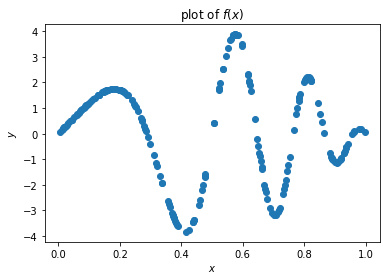

In [24]:
d=1
n=200
X=torch.rand(n,d)
y=4*torch.sin(np.pi*X)*torch.cos(6*np.pi*X**2)

plt.scatter(X.numpy(),y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [25]:
# feel free to play with these parameters
step_size=0.05
n_epochs=6000
n_hidden_1=32
n_hidden_2=32
d_out=1

neural_network=nn.Sequential(
    nn.Linear(d,n_hidden_1),
    nn.Tanh(),
    nn.Linear(n_hidden_1,n_hidden_2),
    nn.Tanh(),
    nn.Linear(n_hidden_2,d_out)
)
loss_func=nn.MSELoss()
optim=torch.optim.SGD(neural_network.parameters(),lr=step_size)
print('iter,\tloss')
for i in range(n_epochs):
    y_hat=neural_network(X)
    loss=loss_func(y_hat,y)
    optim.zero_grad()
    loss.backward()
    optim.step()

    if i%(n_epochs//10)==0:
        print('{},\t{:.2f}'.format(i,loss.item()))

iter,	loss
0,	3.96
600,	3.69
1200,	2.58
1800,	1.10
2400,	0.91
3000,	0.68
3600,	0.14
4200,	0.08
4800,	0.06
5400,	0.20


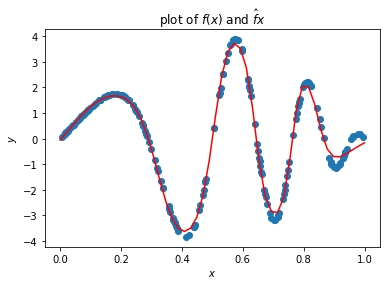

In [26]:
X_grid=torch.from_numpy(np.linspace(0,1,50)).float().view(-1,d)
y_hat=neural_network(X_grid)
plt.scatter(X.numpy(),y.numpy())
plt.plot(X_grid.detach().numpy(),y_hat.detach().numpy(),'r')
plt.title('plot of $f(x)$ and $\hat{f}{x}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()